# Disney+ Dataset – Exploratory Data Analysis
**Name:** Varun Sharma  
**Course:** [Data Science]  
**Date:** 14 June 2025


## 1. Introduction

The dataset titled “Disney+ Movies and TV Shows” contains information about titles available on the Disney+ streaming platform as of 2021. It includes metadata for each title such as:

Title: Name of the show or movie

Type: Movie or TV Show

Director and Cast

Country of production

Date Added to Disney+

Release Year

Rating, Duration, and Genres

**Project Goals**

The primary goal of this EDA (Exploratory Data Analysis) is to:

Understand the composition of Disney+ content in terms of type, genre, release year, and rating.

Analyze trends over time, such as how many titles are added each year.

Identify content patterns, such as popular genres, countries, or durations.

Create visualizations to uncover hidden insights and support storytelling.

Clean and transform the data to make it analysis-ready using pandas.

By the end of this EDA, we aim to gain actionable insights about Disney+ content strategy, target audience, and historical trends.


## 2. Data Overview
- `.shape`
- `.info()`
- `.describe()`
- Sample records using `df.head()`

## 3. Data Cleaning
- Handling missing values
- Date parsing
- Removing duplicates (if any)

## 4. Feature Engineering
- Extracting `year_added`, `month_added`
- Creating new columns like content age, type flags, etc.

## 5. Univariate Analysis
- Countplots, value_counts for:
  - Type (Movie vs TV Show)
  - Rating
  - Release year
  - Country

## 6. Bivariate/Multivariate Analysis
- Year vs number of titles added
- Type vs rating
- Genre vs type

## 7. Visualizations
- Use `seaborn`, `matplotlib`, or `plotly`
- Bar charts, pie charts, line plots

## 8. Key Findings
Summarize what insights you found:
- Is Disney+ adding more movies or shows recently?
- Which ratings are most common?
- Popular countries or genres?

## 9. Conclusion
- Final thoughts
- Limitations
- Scope for further analysis

## 10. References
- Kaggle dataset link
- Google Drive share link

In [36]:
import numpy as np
import pandas as pd


In [40]:
!pip install -q gdown
!gdown 1sbEscBFgMh9KjGQdPcl6HnEp5MdxrTwY --output disney_plus_titles.csv


Downloading...
From: https://drive.google.com/uc?id=1sbEscBFgMh9KjGQdPcl6HnEp5MdxrTwY
To: /content/disney_plus_titles.csv
100% 363k/363k [00:00<00:00, 115MB/s]


# Disney+ Explanatory Data Analysis (compared with Netflix)

In [41]:
df = pd.read_csv("disney_plus_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,A Spark Story,"Jason Sterman, Leanne Dare","Apthon Corbin, Louis Gonzales",NaN,"September 24, 2021",2021,TV-PG,88 min,Documentary,Two Pixar filmmakers strive to bring their uni...
1,s2,Movie,Spooky Buddies,Robert Vince,"Tucker Albrizzi, Diedrich Bader, Ameko Eks Mas...","United States, Canada","September 24, 2021",2011,G,93 min,"Comedy, Fantasy, Kids",The puppies go on a spooky adventure through a...
2,s3,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sa...",United States,"September 24, 2021",2014,PG-13,127 min,"Coming of Age, Drama, Romance",Hazel and Gus share a love that sweeps them on...
3,s4,TV Show,Dog: Impossible,NaN,Matt Beisner,United States,"September 22, 2021",2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",Matt Beisner uses unique approaches to modifyi...
4,s5,TV Show,Spidey And His Amazing Friends,NaN,"Benjamin Valic, Lily Sanfelippo, Jakari Fraser...",United States,"September 22, 2021",2021,TV-Y,1 Season,"Action-Adventure, Animation, Kids",Spidey teams up with pals to become The Spidey...


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1368 non-null   object
 1   type          1368 non-null   object
 2   title         1368 non-null   object
 3   director      928 non-null    object
 4   cast          1194 non-null   object
 5   country       1193 non-null   object
 6   date_added    1365 non-null   object
 7   release_year  1368 non-null   int64 
 8   rating        1366 non-null   object
 9   duration      1368 non-null   object
 10  listed_in     1368 non-null   object
 11  description   1368 non-null   object
dtypes: int64(1), object(11)
memory usage: 128.4+ KB


In [43]:
#missing values
df.isna().sum()


,0
show_id,0
type,0
title,0
director,440
cast,174
country,175
date_added,3
release_year,0
rating,2
duration,0


In [44]:
#preprocess data to analyze(change data type)
df= df.astype({'date_added':'datetime64[ns]'})



In [45]:

df=df.dropna(subset=['date_added'])

In [46]:
df['year_added'] =df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

df['year_added'] = df['year_added'].astype(int)
df['month_added'] = df['month_added'].astype(int)

In [47]:
#need to make two columns of min_duration and series_duration
df.duration.unique()

array(['88 min', '93 min', '127 min', '2 Seasons', '1 Season', '106 min',
       '22 min', '116 min', '44 min', '9 min', '42 min', '16 Seasons',
       '11 min', '140 min', '3 Seasons', '19 Seasons', '66 min',
       '131 min', '115 min', '137 min', '99 min', '14 min', '85 min',
       '9 Seasons', '104 min', '105 min', '92 min', '126 min', '82 min',
       '94 min', '91 min', '87 min', '125 min', '95 min', '54 min',
       '7 Seasons', '6 min', '4 Seasons', '101 min', '98 min', '102 min',
       '80 min', '170 min', '97 min', '112 min', '7 min', '108 min',
       '21 min', '20 min', '15 min', '19 min', '10 Seasons', '5 Seasons',
       '79 min', '6 Seasons', '89 min', '4 min', '18 min', '81 min',
       '148 min', '121 min', '96 min', '45 min', '109 min', '107 min',
       '86 min', '53 min', '24 min', '8 Seasons', '12 min', '65 min',
       '48 min', '111 min', '43 min', '180 min', '182 min', '60 min',
       '50 min', '46 min', '123 min', '113 min', '117 min', '83 min',
       '3 mi

In [48]:
df['min_duration'] = df['duration'].apply(lambda x: x.split()[0] if 'min' in x else None)


In [49]:
df['seasons'] =df['duration'].apply(lambda x: x if 'Seasons' in x else None)

In [50]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,min_duration,seasons
0,s1,Movie,A Spark Story,"Jason Sterman, Leanne Dare","Apthon Corbin, Louis Gonzales",NaN,2021-09-24,2021,TV-PG,88 min,Documentary,Two Pixar filmmakers strive to bring their uni...,2021,9,88,None
1,s2,Movie,Spooky Buddies,Robert Vince,"Tucker Albrizzi, Diedrich Bader, Ameko Eks Mas...","United States, Canada",2021-09-24,2011,G,93 min,"Comedy, Fantasy, Kids",The puppies go on a spooky adventure through a...,2021,9,93,None
2,s3,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sa...",United States,2021-09-24,2014,PG-13,127 min,"Coming of Age, Drama, Romance",Hazel and Gus share a love that sweeps them on...,2021,9,127,None


In [51]:
import seaborn as sns

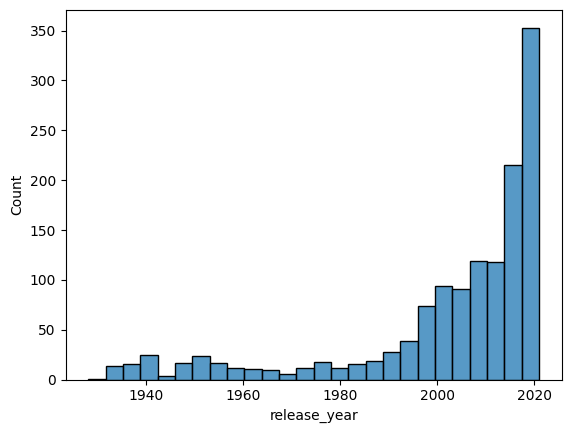

In [52]:
ax = sns.histplot(x='release_year',data=df)

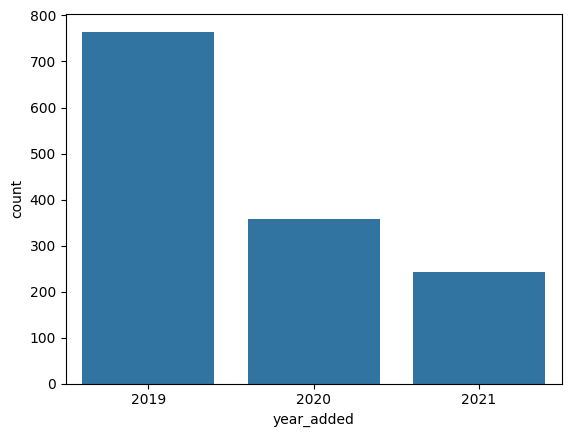

In [53]:
ax =sns.countplot(x='year_added',data=df)

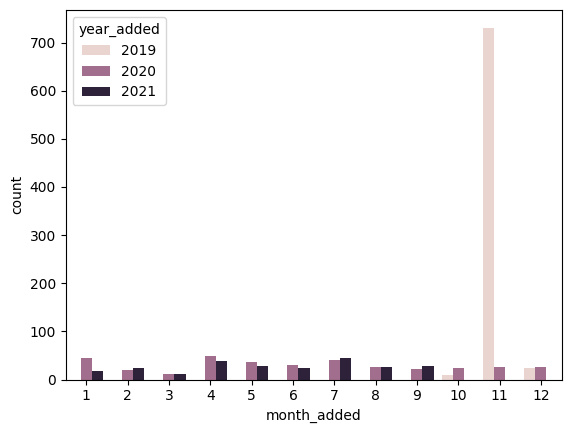

In [54]:
#Disney+ lunched November 12,2019. They added many titles from the past at the first month.#
ax=sns.countplot(x='month_added',hue ="year_added",data=df)

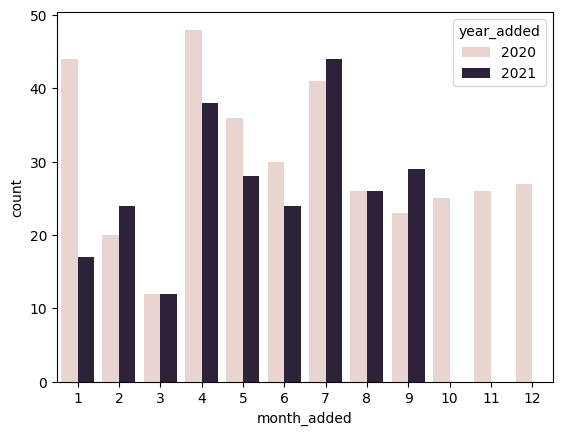

In [55]:
#They add titles in a regular basis if filter the first month out.
df1 = df[df['year_added']>2019]
ax=sns.countplot(x='month_added',hue='year_added',data=df1)

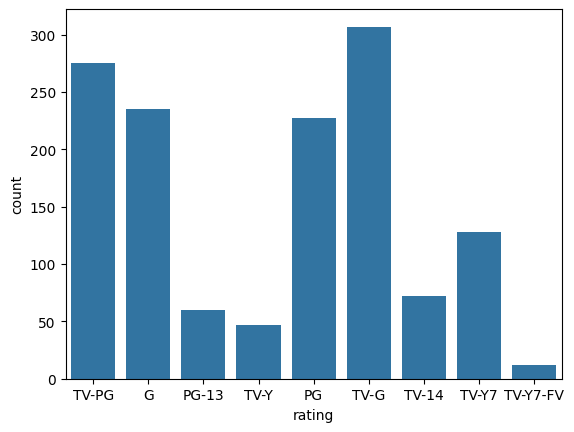

In [56]:
ax = sns.countplot(x='rating',data=df)

In [57]:
categories = df.value_counts(['listed_in']).head(10)
categories

,count
listed_in,
"Animation, Comedy, Family",120
"Action-Adventure, Animation, Comedy",75
"Action-Adventure, Animation, Kids",45
"Animals & Nature, Documentary, Family",40
"Action-Adventure, Animation, Family",40
"Animals & Nature, Docuseries, Family",38
"Animals & Nature, Documentary",34
"Action-Adventure, Comedy, Family",27
"Animation, Family, Fantasy",26


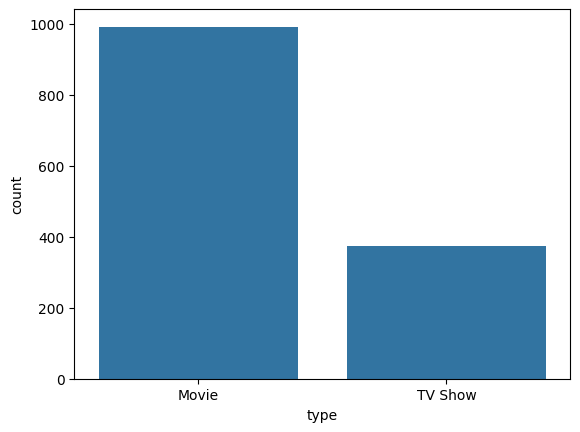

In [58]:
ax = sns.countplot(x='type',data=df)

In [59]:
df.min_duration

,min_duration
0,88
1,93
2,127
3,None
4,None
...,...
1360,None
1361,104
1362,75
1363,80


In [60]:
df.value_counts(['country'])

,count
country,
United States,974
"United States, Canada",28
United Kingdom,23
"United States, United Kingdom",19
"Canada, United States",17
...,...
"United States, United Kingdom, Australia, Canada",1
"United States, United Kingdom, Belgium, Canada",1
"United States, United Kingdom, Hungary",1


# Comparison Between Netflix and Disney+

Netflix Original Films Data(https://www.kaggle.com/satoshiss/netflix-original-films-data)

As I analysed Netflix data before, Netflix has incresed the amount of new titles every year.
On the contrary, Disney+ has added most of titles when they started their service. There were not much growh of the amount of new titles so far.

Netflix tends to realese more new titles in April and October,and not to release many new titles in July. Disney+ has been releasing titles more steadily compared with Netflix.